In [2]:
import pandas as pd
import numpy as np
import os
import glob

In [3]:
# Função para gerar dados fictícios de vendas separados em arquivos CSV
def gerar_dados(qtd_arquivos=3, qtd_linhas_por_arquivo=10):
    # Definição das regiões e intervalo de datas
    regioes = ['MG', 'SP', 'RJ', 'ES']
    datas = pd.date_range(start='2024-01-01', periods=qtd_linhas_por_arquivo, freq='D')
    
    # Criação da pasta para salvar os arquivos
    pasta_destino =  'Dados_do_Teste'
    if not os.path.exists(pasta_destino):
         os.makedirs(pasta_destino)
    
    # Loop para criar múltiplos arquivos CSV
    for i in range(qtd_arquivos):
        # Geração dos dados aleatórios
        dados = {
            'Data':np.random.choice( datas, qtd_linhas_por_arquivo),
            'Região': np.random.choice( regioes, qtd_linhas_por_arquivo),
            'Vendas': np.random.randint( 100, 1000, qtd_linhas_por_arquivo)
        }
        # Criação do DataFrame e salvamento em arquivo CSV
        df = pd.DataFrame(dados)
        caminho_arquivo = os.path.join(pasta_destino, f'Dados_{i}.csv')
        df.to_csv(caminho_arquivo, index=False)

# Geração dos dados fictícios
gerar_dados()


In [25]:
def carregar_arquivos(diretorio):
    arquivos = glob.glob(os.path.join(diretorio, "*.csv"))
    dados = []
    for arquivo in arquivos:
        df = pd.read_csv(arquivo)
        df['Data'] = pd.to_datetime(df['Data'])
        dados.append(df)
    comb_dados = pd.concat(dados, ignore_index=True)
    return comb_dados



In [26]:
df = carregar_arquivos(r'C:\Users\Bl4ck0ut\Pictures\Teste 1\Dados_do_Teste')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    30 non-null     datetime64[ns]
 1   Região  30 non-null     object        
 2   Vendas  30 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 848.0+ bytes


In [30]:
df

,Data,Região,Vendas
0,2024-01-01,MG,433
1,2024-01-06,MG,923
2,2024-01-09,RJ,803
3,2024-01-01,RJ,657
4,2024-01-01,RJ,988
5,2024-01-08,MG,489
6,2024-01-03,MG,715
7,2024-01-02,RJ,167
8,2024-01-10,ES,135
9,2024-01-05,SP,551


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
def analise_data(df):
    total_vendas_regiao = df.groupby('Região')['Vendas'].sum().reset_index()
    print("Total de Vendas por Região:")
    print(total_vendas_regiao)

    df['Mês'] = df['Data'].dt.to_period('M')
    total_mes = df.groupby('Mês')['Vendas'].sum().reset_index()
    print("Vendas Mensais:")
    print(total_mes)

    return total_vendas_regiao, total_mes

In [72]:
analise_data(df)

Total de Vendas por Região:
  Região  Vendas
0     ES    4312
1     MG    4473
2     RJ    5615
3     SP    2969
Vendas Mensais:
       Mês  Vendas
0  2024-01   17369


(  Região  Vendas
 0     ES    4312
 1     MG    4473
 2     RJ    5615
 3     SP    2969,
        Mês  Vendas
 0  2024-01   17369)

In [88]:
def graficos_dados(total_vendas_regiao, total_mes ):
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=total_vendas_regiao, x='Região', y='Vendas', palette='viridis')
    plt.title('Total de Vendas por Região')
    plt.xlabel('Região')
    plt.ylabel('Vendas')
    # Adiciona rótulos de dados
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    plt.show()

Total de Vendas por Região:
  Região  Vendas
0     ES    4312
1     MG    4473
2     RJ    5615
3     SP    2969
Vendas Mensais:
       Mês  Vendas
0  2024-01   17369


C:\Users\Bl4ck0ut\AppData\Local\Temp\ipykernel_18056\3414490545.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=total_vendas_regiao, x='Região', y='Vendas', palette='viridis')


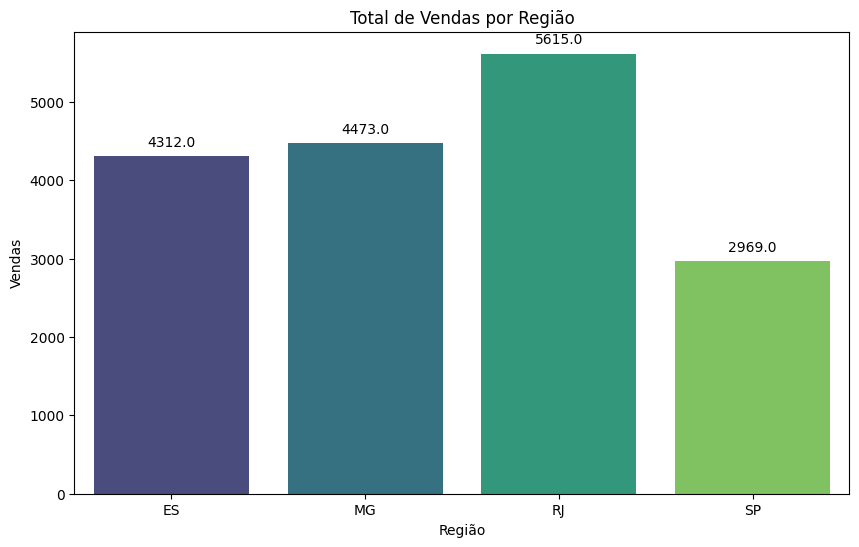

In [89]:
total_vendas_regiao, total_mes = (analise_data(df))

graficos_dados(total_vendas_regiao, total_mes)